In [154]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# define average csv reader
def average_file_read(csv_path):
    data = pd.read_csv(csv_path)
    data = data.dropna()
    data = np.array(data)
    average = np.zeros((data.shape[0]//10, data.shape[1]))
    for i in range(10):
        average += data[i::10]
    average = average / 10
    return average

main_size = 20
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : main_size}

matplotlib.rc('font', **font)

# print(average_file_read("../data1300points.csv")[:,3])
from turtle import color
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)


r = (250, 127, 111)
b = (130, 176, 210)
r = tuple(item / 255 for item in r)
b = tuple(item / 255 for item in b)


<Figure size 640x480 with 0 Axes>

# Create Test Domains

In [155]:
num_increment = 6
small_list = [32, 64, 128, 256]
start = 128
domains = np.zeros((num_increment+len(small_list)*num_increment*6, 3))
print(domains.shape)
for i in range(num_increment):
    # square
    variable_dimension = start * (2 ** i)
    domains[i] = [variable_dimension] * 3

# one small dimension
for j in range(len(small_list)):
    for i in range(num_increment):
        variable_dimension = start * (2 ** i)
        domains[i + (j+1)*num_increment] = [small_list[j], variable_dimension, variable_dimension]
for j in range(len(small_list)):
    for i in range(num_increment):
        variable_dimension = start * (2 ** i)
        domains[i + (j+1+len(small_list))*num_increment] = [variable_dimension, small_list[j], variable_dimension]
for j in range(len(small_list)):
    for i in range(num_increment):
        variable_dimension = start * (2 ** i)
        domains[i + (j+1+2*len(small_list))*num_increment] = [variable_dimension, variable_dimension, small_list[j]]

# two small dimension
for j in range(len(small_list)):
    for i in range(num_increment):
        variable_dimension = start * (2 ** i)
        domains[i + (j+1+3*len(small_list))*num_increment] = [variable_dimension, small_list[j], small_list[j]]
for j in range(len(small_list)):
    for i in range(num_increment):
        variable_dimension = start * (2 ** i)
        domains[i + (j+1+4*len(small_list))*num_increment] = [small_list[j], variable_dimension, small_list[j]]
for j in range(len(small_list)):
    for i in range(num_increment):
        variable_dimension = start * (2 ** i)
        domains[i + (j+1+5*len(small_list))*num_increment] = [small_list[j], small_list[j], variable_dimension]



print(domains)
pd.DataFrame(domains,dtype=int).to_csv('regulated_test.csv', index=None)


(150, 3)
[[ 128.  128.  128.]
 [ 256.  256.  256.]
 [ 512.  512.  512.]
 [1024. 1024. 1024.]
 [2048. 2048. 2048.]
 [4096. 4096. 4096.]
 [  32.  128.  128.]
 [  32.  256.  256.]
 [  32.  512.  512.]
 [  32. 1024. 1024.]
 [  32. 2048. 2048.]
 [  32. 4096. 4096.]
 [  64.  128.  128.]
 [  64.  256.  256.]
 [  64.  512.  512.]
 [  64. 1024. 1024.]
 [  64. 2048. 2048.]
 [  64. 4096. 4096.]
 [ 128.  128.  128.]
 [ 128.  256.  256.]
 [ 128.  512.  512.]
 [ 128. 1024. 1024.]
 [ 128. 2048. 2048.]
 [ 128. 4096. 4096.]
 [ 256.  128.  128.]
 [ 256.  256.  256.]
 [ 256.  512.  512.]
 [ 256. 1024. 1024.]
 [ 256. 2048. 2048.]
 [ 256. 4096. 4096.]
 [ 128.   32.  128.]
 [ 256.   32.  256.]
 [ 512.   32.  512.]
 [1024.   32. 1024.]
 [2048.   32. 2048.]
 [4096.   32. 4096.]
 [ 128.   64.  128.]
 [ 256.   64.  256.]
 [ 512.   64.  512.]
 [1024.   64. 1024.]
 [2048.   64. 2048.]
 [4096.   64. 4096.]
 [ 128.  128.  128.]
 [ 256.  128.  256.]
 [ 512.  128.  512.]
 [1024.  128. 1024.]
 [2048.  128. 2048.]
 [40

# Setonix 

In [156]:
data = pd.read_csv('result_Setonix.csv')
data = np.array(data)

gflop = data[:, 0] * (2* data[:, 1] + 2) * data[:, 2]
gflops = gflop.reshape(-1,1) / (data[:, 3:] * 1e-6) / 1e9 # time in 1e-6, g equals 1e9

domain_gflops = np.copy(data).astype(float)
domain_gflops[:, 3:] = gflops

square = domain_gflops[:num_increment]
for i in range(len(small_list)):
    locals()["small_1_m_"+str(small_list[i])] = domain_gflops[(1+i)*num_increment:(1+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_1_k_"+str(small_list[i])] = domain_gflops[(1+1*len(small_list)+i)*num_increment:(1+1*len(small_list)+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_1_n_"+str(small_list[i])] = domain_gflops[(1+2*len(small_list)+i)*num_increment:(1+2*len(small_list)+i+1)*num_increment]

for i in range(len(small_list)): # k==n
    locals()["small_2_m_"+str(small_list[i])] = domain_gflops[(1+3*len(small_list)+i)*num_increment:(1+3*len(small_list)+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_2_k_"+str(small_list[i])] = domain_gflops[(1+4*len(small_list)+i)*num_increment:(1+4*len(small_list)+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_2_n_"+str(small_list[i])] = domain_gflops[(1+5*len(small_list)+i)*num_increment:(1+5*len(small_list)+i+1)*num_increment]

# num_increment * small_list + 1 个小图

## Square

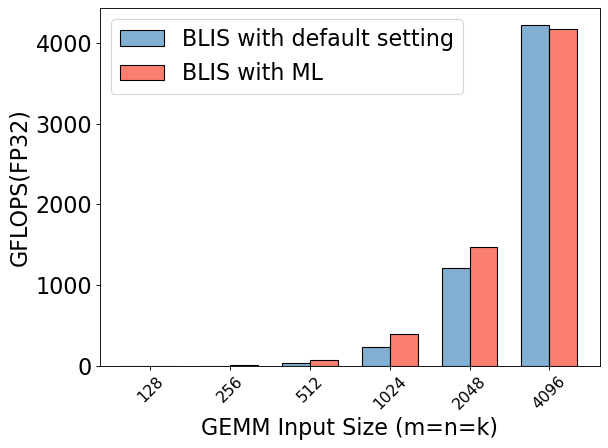

In [157]:

# square = square[:5]
X_axis = np.arange(square.shape[0])
y_1 = square[:, 3]
y_2 = square[:, 4]
figure(figsize=(8, 6), dpi=80)

width = 0.35
plt.bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
plt.bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

# plt.yscale('log')
plt.xticks(X_axis, [start * (2 ** i) for i in range(num_increment)])
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=main_size)
# plt.yticks(np.arange(0, max(y_1)+1000, (1000)))
plt.xlabel("GEMM Input Size (m=n=k)")
plt.ylabel("GFLOPS(FP32)")
# plt.title("Number of Students in each group")
plt.legend(loc=2, fontsize=main_size)
plt.tight_layout()
plt.savefig("fixed-size-comparison-Setonix-square.pdf", bbox_inches='tight', pad_inches=.5)
plt.show()

## Irregular

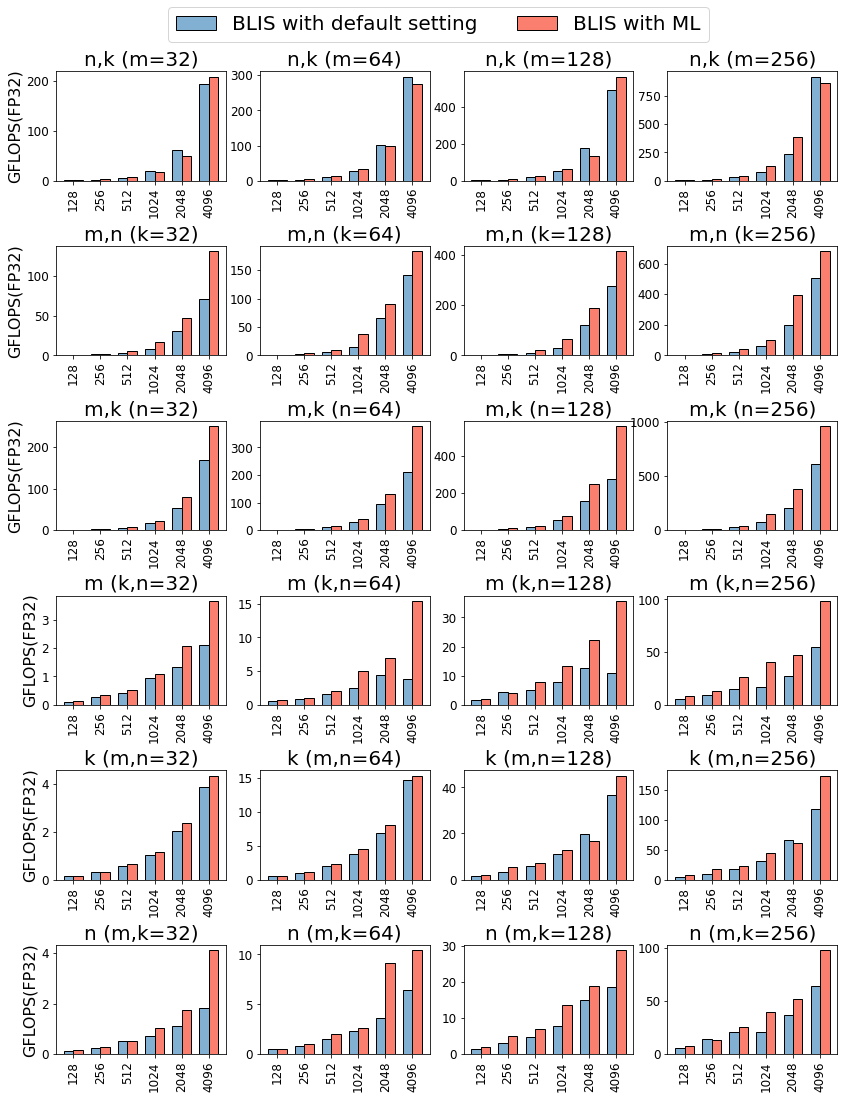

In [158]:
fig, ax = plt.subplots(nrows=num_increment, ncols=len(small_list), sharex=False, figsize=(14, 14))
ax=ax.flat

main_size = 12
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : main_size}



# m
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_1_m_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_1_m_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[i].bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
    ax[i].bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

    # ax[i].set_yscale('log')
    ax[i].set_xticks(X_axis, [str(start * (2 ** i)) for i in range(num_increment)])
    # ax[i].set_yticks(fontsize=14)
    # ax[i].yticks(np.arange(0, max(y_1)+1000, (1000)))
    ax[i].set_title("n,k " + "(m=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[0*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

# k
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_1_k_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_1_k_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
    ax[len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[len(small_list)+i].set_title("m,n " + "(k=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

# k
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_1_n_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_1_n_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[2*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
    ax[2*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[2*len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[2*len(small_list)+i].set_title("m,k " + "(n=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[2*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[2*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[2*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

#*******************************************#
# k,n
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_2_m_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_2_m_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[3*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
    ax[3*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[3*len(small_list)+i].set_xticks(X_axis)
    ax[3*len(small_list)+i].set_xticklabels([str(start * (2 ** i)) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[3*len(small_list)+i].set_title("m " + "(k,n=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[3*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[3*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[3*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

# m,n
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_2_k_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_2_k_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[4*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
    ax[4*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[4*len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[4*len(small_list)+i].set_title("k " + "(m,n=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[4*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[4*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[4*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)


# m,k
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_2_n_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_2_n_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[5*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
    ax[5*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[5*len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[5*len(small_list)+i].set_title("n " + "(m,k=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[5*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[5*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[5*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)


plt.legend(loc='center left', bbox_to_anchor=(-3.0, 9.43), ncol=2,fontsize=20) # set legend format
X_axis = np.arange(square.shape[0])
plt.setp([a.get_xticklabels() for a in ax], visible=True)
# fig.tight_layout(pad=10.0)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=None, hspace=.6) # adjust padding
plt.savefig("fixed-size-comparison-Setonix-irregular.pdf", bbox_inches='tight', pad_inches=.5)
plt.show()

# Gadi

In [159]:
data = pd.read_csv('result_Gadi.csv')
data = np.array(data)

gflop = data[:, 0] * (2* data[:, 1] + 2) * data[:, 2]
gflops = gflop.reshape(-1,1) / (data[:, 3:] * 1e-6) / 1e9 # time in 1e-6, g equals 1e9

domain_gflops = np.copy(data).astype(float)
domain_gflops[:, 3:] = gflops

square = domain_gflops[:num_increment]
for i in range(len(small_list)):
    locals()["small_1_m_"+str(small_list[i])] = domain_gflops[(1+i)*num_increment:(1+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_1_k_"+str(small_list[i])] = domain_gflops[(1+1*len(small_list)+i)*num_increment:(1+1*len(small_list)+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_1_n_"+str(small_list[i])] = domain_gflops[(1+2*len(small_list)+i)*num_increment:(1+2*len(small_list)+i+1)*num_increment]

for i in range(len(small_list)): # k==n
    locals()["small_2_m_"+str(small_list[i])] = domain_gflops[(1+3*len(small_list)+i)*num_increment:(1+3*len(small_list)+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_2_k_"+str(small_list[i])] = domain_gflops[(1+4*len(small_list)+i)*num_increment:(1+4*len(small_list)+i+1)*num_increment]
for i in range(len(small_list)):
    locals()["small_2_n_"+str(small_list[i])] = domain_gflops[(1+5*len(small_list)+i)*num_increment:(1+5*len(small_list)+i+1)*num_increment]

# num_increment * small_list + 1 个小图

## Square

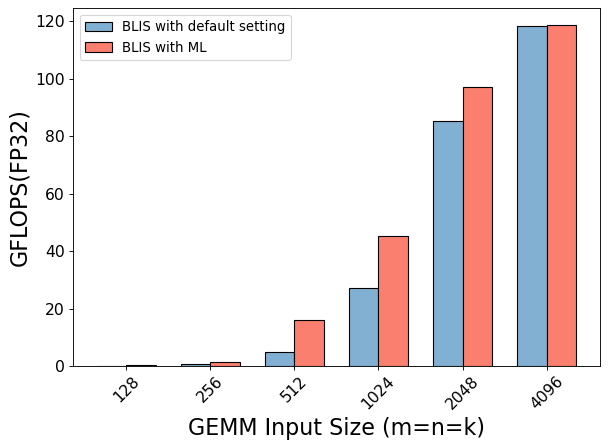

In [160]:

# square = square[:5]
X_axis = np.arange(square.shape[0])
y_1 = square[:, 3]
y_2 = square[:, 4]
figure(figsize=(8, 6), dpi=80)

width = 0.35
plt.bar(X_axis - width/2, y_1, width, label = 'BLIS with default setting', color=b, edgecolor = "black")
plt.bar(X_axis + width/2, y_2, width, label = 'BLIS with ML', color=r, edgecolor = "black")

# plt.yscale('log')
plt.xticks(X_axis, [start * (2 ** i) for i in range(num_increment)])
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
# plt.yticks(np.arange(0, max(y_1)+1000, (1000)))
plt.xlabel("GEMM Input Size (m=n=k)")
plt.ylabel("GFLOPS(FP32)")
# plt.title("Number of Students in each group")
plt.legend(loc=2, fontsize=main_size)
plt.tight_layout()
plt.savefig("fixed-size-comparison-Setonix-square.pdf", bbox_inches='tight', pad_inches=.5)
plt.show()

## irregular

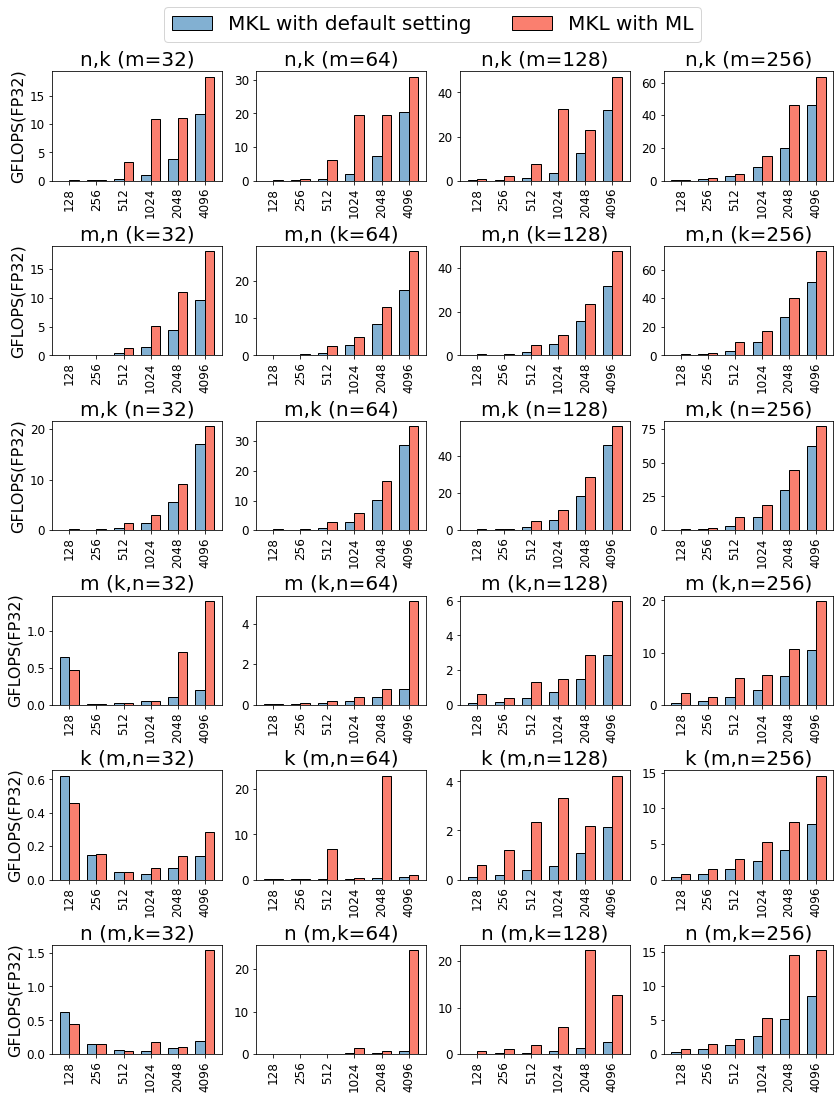

In [161]:
fig, ax = plt.subplots(nrows=num_increment, ncols=len(small_list), sharex=False, figsize=(14, 14))
ax=ax.flat

main_size = 12
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : main_size}



# m
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_1_m_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_1_m_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[i].bar(X_axis - width/2, y_1, width, label = 'MKL with default setting', color=b, edgecolor = "black")
    ax[i].bar(X_axis + width/2, y_2, width, label = 'MKL with ML', color=r, edgecolor = "black")

    # ax[i].set_yscale('log')
    ax[i].set_xticks(X_axis, [str(start * (2 ** i)) for i in range(num_increment)])
    # ax[i].set_yticks(fontsize=14)
    # ax[i].yticks(np.arange(0, max(y_1)+1000, (1000)))
    ax[i].set_title("n,k " + "(m=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[0*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

# k
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_1_k_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_1_k_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'MKL with default setting', color=b, edgecolor = "black")
    ax[len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'MKL with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[len(small_list)+i].set_title("m,n " + "(k=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

# k
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_1_n_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_1_n_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[2*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'MKL with default setting', color=b, edgecolor = "black")
    ax[2*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'MKL with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[2*len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[2*len(small_list)+i].set_title("m,k " + "(n=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[2*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[2*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[2*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

#*******************************************#
# k,n
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_2_m_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_2_m_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[3*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'MKL with default setting', color=b, edgecolor = "black")
    ax[3*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'MKL with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[3*len(small_list)+i].set_xticks(X_axis)
    ax[3*len(small_list)+i].set_xticklabels([str(start * (2 ** i)) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[3*len(small_list)+i].set_title("m " + "(k,n=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[3*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[3*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[3*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)

# m,n
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_2_k_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_2_k_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[4*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'MKL with default setting', color=b, edgecolor = "black")
    ax[4*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'MKL with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[4*len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_xticks(fontsize=14, rotation=45)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[4*len(small_list)+i].set_title("k " + "(m,n=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[4*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[4*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[4*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)


# m,k
for i in range(len(small_list)):
    X_axis = np.arange(square.shape[0])
    y_1 = locals()["small_2_n_"+str(small_list[i])][:, 3]
    y_2 = locals()["small_2_n_"+str(small_list[i])][:, 4]
    # figure(figsize=(8, 6), dpi=80)
    width = 0.35
    ax[5*len(small_list)+i].bar(X_axis - width/2, y_1, width, label = 'MKL with default setting', color=b, edgecolor = "black")
    ax[5*len(small_list)+i].bar(X_axis + width/2, y_2, width, label = 'MKL with ML', color=r, edgecolor = "black")

    # ax[len(small_list)+i].set_yscale('log')
    ax[5*len(small_list)+i].set_xticks(X_axis, [start * (2 ** i) for i in range(num_increment)], fontsize=main_size)
    # ax[len(small_list)+i].set_yticks(fontsize=14)
    # ax[len(small_list)+i].yticks(np.arange(0, max(y_1)+1000, (1000)))

    ax[5*len(small_list)+i].set_title("n " + "(m,k=" + str(small_list[i]) + ")", fontsize=20)
    if i == 0:
        ax[5*len(small_list)+i].set_ylabel("GFLOPS(FP32)", fontsize=16)
    ax[5*len(small_list)+i].tick_params(axis='x', which='major', labelsize=12,labelrotation=90)
    ax[5*len(small_list)+i].tick_params(axis='y', which='major', labelsize=12,labelrotation=0)


plt.legend(loc='center left', bbox_to_anchor=(-3.0, 9.43), ncol=2,fontsize=20) # set legend format
X_axis = np.arange(square.shape[0])
plt.setp([a.get_xticklabels() for a in ax], visible=True)
# fig.tight_layout(pad=10.0)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=None, hspace=.6) # adjust padding
plt.savefig("fixed-size-comparison-Gadi-irregular.pdf", bbox_inches='tight', pad_inches=.5)
plt.show()